In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


In [2]:
env = gym.make('CliffWalking-v0')

alpha = 0.1  # Tasa de aprendizaje
gamma = 0.99  # Factor de descuento
epsilon = 0.1  # Parámetro epsilon-greedy
num_episodes = 500  # Número de episodios


In [3]:
def sarsa(env, alpha, gamma, epsilon, num_episodes):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []

    for i in range(num_episodes):
        state, _ = env.reset()
        action = np.random.choice(env.action_space.n) if np.random.uniform(0, 1) < epsilon else np.argmax(q_table[state])
        total_reward = 0

        while True:
            next_state, reward, done, _, _ = env.step(action)
            next_action = np.random.choice(env.action_space.n) if np.random.uniform(0, 1) < epsilon else np.argmax(q_table[next_state])
            
            q_table[state, action] += alpha * (reward + gamma * q_table[next_state, next_action] - q_table[state, action])
            
            state, action = next_state, next_action
            total_reward += reward
            
            if done:
                break
        
        rewards_per_episode.append(total_reward)
    
    return rewards_per_episode


In [4]:
def q_learning(env, alpha, gamma, epsilon, num_episodes):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_per_episode = []

    for i in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0

        while True:
            action = np.random.choice(env.action_space.n) if np.random.uniform(0, 1) < epsilon else np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
            
            state = next_state
            total_reward += reward
            
            if done:
                break
        
        rewards_per_episode.append(total_reward)
    
    return rewards_per_episode


In [5]:
sarsa_rewards = sarsa(env, alpha, gamma, epsilon, num_episodes)
q_learning_rewards = q_learning(env, alpha, gamma, epsilon, num_episodes)


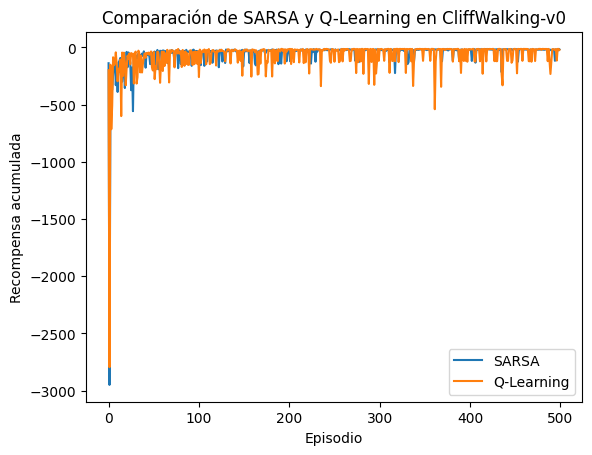

In [6]:
plt.plot(sarsa_rewards, label="SARSA")
plt.plot(q_learning_rewards, label="Q-Learning")
plt.xlabel("Episodio")
plt.ylabel("Recompensa acumulada")
plt.legend()
plt.title("Comparación de SARSA y Q-Learning en CliffWalking-v0")
plt.show()


a.	P1: ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?

- La principal diferencia es que SARSA hace que su acción prosiga al siguiente estado basándose realmente en la acción de tomó actualizando así Q, mientras que Q-Learning se base principalmente en tomar la acción óptima que encontró para el siguiente estado y así actuliza Q.

b.	P2: ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?

- Es más optimista ya que los valores de Q se van actualizando esto gracias al valor máximo estimado por lo que se podría decir que este está buscando una acción óptima para el siguiente estado basándose sí tomará el valor máximo u óptimo.

c.	P3: ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q-Learning?

- La política on-policy de SARSA puede hacer que el aprendizaje no sea tan óptimo dependiendo de la política. Además, hace que este método sea un poco más vigoroso a ciertos cambios de la política. Por otra parte, el off-policy del Q-Learning puede llegar a hacer al método más óptimo ya que las políticas iran cambiando a otras haciendo así una exploración de diferentes políticas.

d.	P4: Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?

- El algoritmo de Q-Learning tiene una ventaja más en poder aprender de manera más rápida y segura, ya que al basarse en el valor máximo estimado para tomar su siguiente acción puede tomar mejores deiciones.

e.	P5: ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?

- Para el algoritmo SARSA, disminuir épsilon provaca que este se enfoque más en la política que está utilizando por lo que las acciones aleatorias pueden ser menores en este caso. Mientras que en Q-Learning también hace que se enfoque más en su política pero puede pasar el caso que al ya no explorar más políticas puede quedar en un loop en una política que no es subóptima.
